In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [169]:
df = pd.read_csv('AML_Ensembles.csv')

In [170]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [171]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
total_bill,total_bill,0.0
tip,tip,0.0
sex,sex,0.0
smoker,smoker,0.0
day,day,0.0
time,time,0.0
size,size,0.0


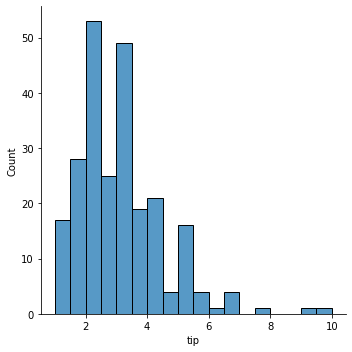

In [172]:
sns.displot(df, x="tip")

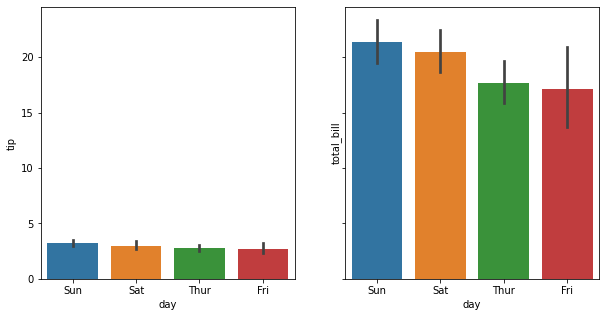

In [173]:
fig, axes = plt.subplots(1,2, figsize=(10,5), sharey=True)
sns.barplot(ax = axes[0], data=df, x='day', y='tip')
sns.barplot(ax = axes[1], data=df, x='day', y='total_bill')
plt.show()

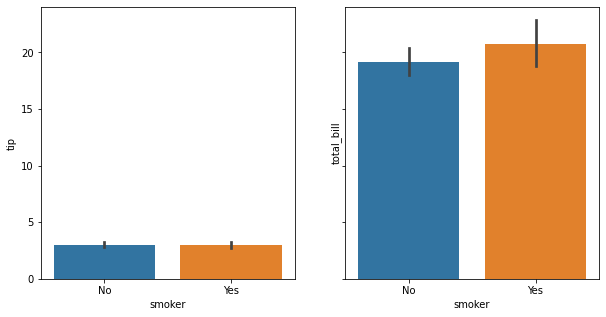

In [174]:
fig, axes = plt.subplots(1,2, figsize=(10,5), sharey=True)
sns.barplot(ax = axes[0], data=df, x='smoker', y='tip')
sns.barplot(ax = axes[1], data=df, x='smoker', y='total_bill')
plt.show()

Saturday tip is higher than the rest of the week


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [176]:
from sklearn.preprocessing import LabelEncoder
catigorical_col = ['sex','smoker','day','time']
df[catigorical_col] = df[catigorical_col].apply(LabelEncoder().fit_transform)
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
5,25.29,4.71,1,0,2,0,4
6,8.77,2.00,1,0,2,0,2
7,26.88,3.12,1,0,2,0,4
8,15.04,1.96,1,0,2,0,2
9,14.78,3.23,1,0,2,0,2


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int32  
 3   smoker      244 non-null    int32  
 4   day         244 non-null    int32  
 5   time        244 non-null    int32  
 6   size        244 non-null    int64  
dtypes: float64(2), int32(4), int64(1)
memory usage: 9.7 KB


In [178]:
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=0.3, random_state=43)
yy=y_train.fillna(0).astype(int)
pd.set_option('display.max_rows', None)
dd=yy.to_numpy()
dd


array([ 3,  1,  3,  1,  1,  3,  3,  3,  3,  3,  3,  2,  4,  3,  4,  1,  2,
        2,  2,  5,  2,  5,  2,  3,  1,  1,  2, 10,  5,  3,  4,  2,  2,  5,
        1,  4,  1,  3,  2,  4,  2,  2,  2,  3,  3,  3,  1,  2,  3,  3,  5,
        3,  2,  2,  9,  2,  1,  3,  2,  3,  3,  4,  3,  2,  2,  2,  1,  3,
        4,  2,  1,  3,  4,  2,  3,  3,  3,  4,  2,  2,  3,  3,  1,  2,  2,
        5,  3,  5,  1,  2,  4,  2,  2,  3,  1,  2,  2,  7,  1,  5,  4,  4,
        4,  1,  1,  1,  2,  3,  2,  2,  2,  1,  2,  1,  3,  2,  2,  3,  3,
        3,  5,  4,  6,  2,  2,  1,  3,  4,  2,  2,  3,  2,  2,  5,  4,  3,
        2,  3,  3,  4,  1,  2,  1,  1,  1,  1,  3,  1,  2,  3,  2,  2,  4,
        2,  3,  1,  4,  2,  3,  4,  3,  2,  1,  2,  1,  1,  2,  3,  2,  2])

In [179]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [200,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rfc=RandomForestClassifier(random_state=55)

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, dd)

print (CV_rfc.best_params_)

C:\Users\Nurserik\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}


In [180]:
pred=CV_rfc.predict(X_test)
pred

array([3, 3, 3, 3, 3, 3, 2, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 3,
       2, 2, 3, 3, 4, 3, 3, 3, 1, 3, 1, 1, 2, 3, 3, 2, 3, 1, 2, 3, 2, 2,
       3, 2, 1, 1, 2, 3, 3, 3, 3, 3, 5, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1,
       2, 2, 3, 1, 3, 3, 1, 3])

best_params:{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}

In [181]:
from sklearn.metrics import mean_absolute_error as mae
error = mae(y_test, pred)
error

1.0148648648648648

In [182]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, pred)

0.32211488905522306

In [183]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred)

1.8335297297297295

In [184]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.10719790425553322

In [185]:
train_df.corrwith(df['tip'])

size           0.489299
total_bill     0.675734
sex_Female    -0.088862
sex_Male       0.088862
smoker_No     -0.005929
smoker_Yes     0.005929
day_Fri       -0.055463
day_Sat       -0.002790
day_Sun        0.125114
day_Thur      -0.095879
time_Dinner    0.121629
time_Lunch    -0.121629
dtype: float64

Most important features are total bill and size because as we see on the table they have high correlation index with tip.
